## Load the json files ofr RCP85 and RCP45, 2050 and 2100

In [1]:
library(rjson)
library("IRdisplay")

Warning message:
“package ‘rjson’ was built under R version 3.6.3”
Warning message:
“package ‘IRdisplay’ was built under R version 3.6.3”


In [12]:
"coastal_plot"=function(res, title, ylab='FALSE', mar=c(3,4,2,0), do_ylab='TRUE', do_xlab='TRUE'){

    # RCP85-RCP45
    general_cex = 1.3
    pcex=1.6
    lwdp = 4
    lwd = 6

    color_rcp45='dodgerblue2'
    color_rcp85='firebrick2'

    color = 'dodgerblue2'
    
    par(cex=general_cex)
    par(mar=mar)
    ylim=c(-600,300)
    
    xval = 1:5
    plot(xval, rep(0,length(xval)), type='l', lty=2, lwd=2, 
         ylim=ylim, xlab='', ylab='', xaxt='n', yaxt='n', yaxs='i', xaxs='i')
    for (yval in seq(-600,200,by=200)){
        lines(xval, rep(yval,length(xval)), type='l', lty=2)
    }
    lines(c(3,3), ylim, type='l', lwd=5, col='gray')
    # -- X axis
    axis(1, at=c(2,4), labels=c('',''), font=2)
    if (do_xlab=='TRUE'){
        par(cex=2.7)
        axis(1, at=c(2,4), tick='FALSE', labels=c('mid-','long-'), font=1, line=0)
        axis(1, at=c(2,4), tick='FALSE', labels=c('term','term'), font=1, line=1.2)
        par(cex=general_cex)
    }#end
    
    # -- Y axis
    par(cex=2.4)
    axis(2, at=seq(-600,200,200), labels = c('','','','',''), font=2, las=1)
    if (do_ylab=='TRUE'){ axis(2, at=seq(-600,200,200), font=1, las=1, tick='FALSE', line=-0.4) }
    par(cex=general_cex)
    
    # -- Title
    mtext(title,3, font=2, cex=3, line=0.5)#, adj=0)
    if (ylab=='TRUE'){ mtext("Meters",2, font=2, cex=1.5, line=2.5) }
    
    xmid = 2
    xlong = 4
    xadj = 0.15

    resname = 'RCP85_mid'
    color = color_rcp85
    lines(c(xmid+xadj, xmid+xadj), c(res[[resname]][1], res[[resname]][3]), type='l', lwd=lwd, col=color)
    points(xmid+xadj, res[[resname]][2], pch=16, col=color, cex=pcex)

    resname = 'RCP45_mid'
    color = color_rcp45
    lines(c(xmid-xadj, xmid-xadj), c(res[[resname]][1], res[[resname]][3]), type='l', lwd=lwd, col=color)
    points(xmid-xadj, res[[resname]][2], pch=16, col=color, cex=pcex)

    resname = 'RCP85_late'
    color = color_rcp85
    lines(c(xlong+xadj, xlong+xadj), c(res[[resname]][1], res[[resname]][3]), type='l', lwd=lwd, col=color)
    points(xlong+xadj, res[[resname]][2], pch=16, col=color, cex=pcex)

    resname = 'RCP45_late'
    color = color_rcp45
    lines(c(xlong-xadj, xlong-xadj), c(res[[resname]][1], res[[resname]][3]), type='l', lwd=lwd, col=color)
    points(xlong-xadj, res[[resname]][2], pch=16, col=color, cex=pcex)

}


"legend_coastal_plot"=function(){

    # RCP85-RCP45
    general_cex = 1.6
    pcex=1.6
    lwdp = 4
    lwd = 6

    color='dodgerblue2'
    color_rcp45='dodgerblue2'
    color_rcp85='firebrick2'
    
    par(cex=general_cex)
    
    par(mar=c(0,0,2.5,0))
    ylim=c(-1000,600)
    xval = 1:5
    plot(xval, rep(0,length(xval)), type='l', col='white', #bty="n",
         lty=2, lwd=2, ylim=ylim, xlab='', ylab='', xaxt='n', yaxt='n', xaxs='i')
    
    # -- Title
    text(1.075,360, "Legend", font=2, cex=1.8, adj=0)

    # -- p5/median/p95
    ymedian = -150
    yhalflen = 400
    xmedian = 1.9
    xtextadj = 0.1
    lines(c(xmedian, xmedian), c(ymedian-yhalflen,ymedian+yhalflen), type='l', lwd=lwd, col='black')
    par(cex=general_cex+0.4)
    points(xmedian, ymedian, pch=16, col='black', cex=pcex, lwd=lwdp)
    text(xmedian+xtextadj, ymedian+yhalflen, "95th percentile",adj=0, cex=1.2)
    text(xmedian+xtextadj, ymedian, "Median estimate",adj=0, cex=1.2)
    text(xmedian+xtextadj, ymedian-yhalflen, "5th percentile",adj=0, cex=1.2)
    par(cex=general_cex)
    
    
    # -- CMIP5 - RCP85
    color = color_rcp85
    xrcp85 = 3.3
    lenline = 0.4
    yrcp85 = 100
    lines(c(xrcp85, xrcp85+lenline), c(yrcp85,yrcp85), type='l', lwd=lwdp, col=color)
    points(xrcp85+(lenline/2), yrcp85, pch=16, col=color, lwd=lwdp, cex=pcex)
    text(xrcp85+lenline*1.2, yrcp85, "CMIP5 RCP8.5",adj=0, font=2, cex=1.7)
    
    # -- CMIP5 - RCP45
    color = color_rcp45
    xrcp45 = 3.3
    yrcp45 = -300
    lines(c(xrcp45, xrcp45+lenline), c(yrcp45,yrcp45), type='l', lwd=lwd, col=color)
    points(xrcp45+(lenline/2), yrcp45, pch=16, col=color, lwd=lwdp, cex=pcex)
    text(xrcp45+lenline*1.2, yrcp45, "CMIP5 RCP4.5",adj=0, font=2, cex=1.7)
    

}

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/coastal_recession/globalErosionProjections_by_AR6_region_RCP85_2050.json'”
Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/coastal_recession/globalErosionProjections_by_AR6_region_RCP85_2100.json'”
Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/coastal_recession/globalErosionProjections_by_AR6_region_RCP45_2050.json'”
Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/coastal_recession/globalErosionProjections_by_AR6_region_RCP45_2100.json'”


png 
  2

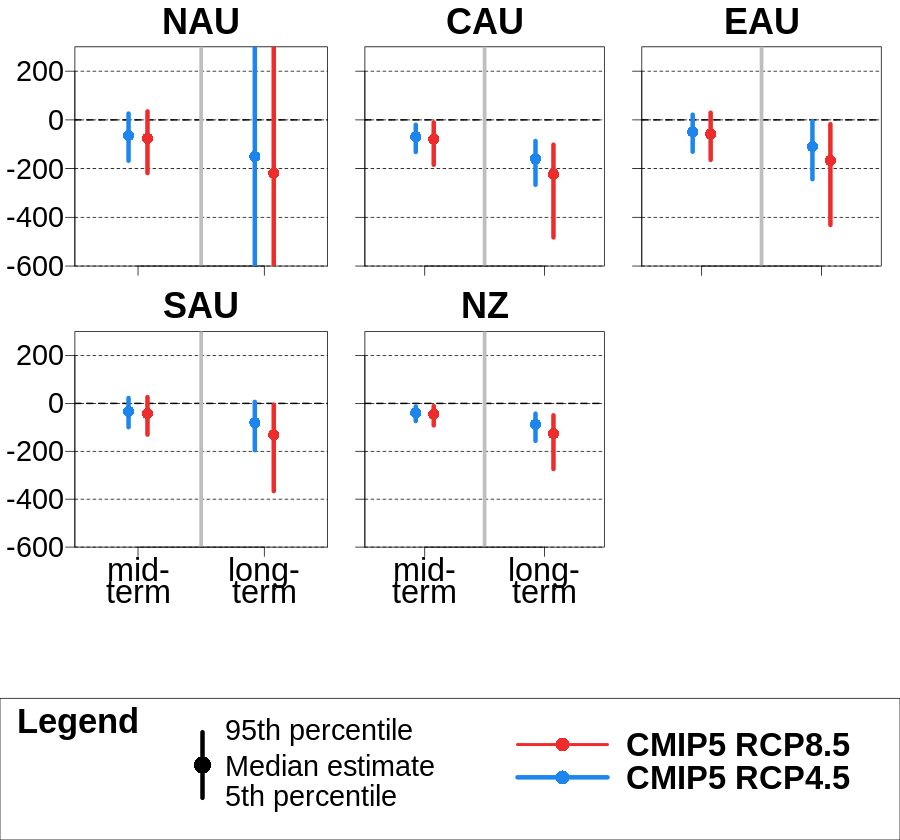

In [13]:
region = 'Australasia'

res = list()

subregions = c('NAU','CAU','EAU','SAU','NZ')
for (scenario in c('RCP85','RCP45')){
    for (horizon in c('2050','2100')){
        json_file = paste('/home/jservon/Chapter12_IPCC/data/coastal_recession/globalErosionProjections_by_AR6_region_',scenario,'_',horizon,'.json',sep='')
        if (horizon=='2050'){term='mid'}
        if (horizon=='2100'){term='late'}
        wname = paste(scenario,term,sep='_')
        res[[wname]] = list()
        
        json_data <- fromJSON(paste(readLines(json_file), collapse=""))
        for (subregion in subregions){
            res[[wname]][[subregion]] = c(json_data[[subregion]]$q5, json_data[[subregion]]$median, json_data[[subregion]]$q95)            #}#end if
        }#end subregion
    }#end horizon
}#and scenario


figname = paste('/home/jservon/Chapter12_IPCC/figs/Figure_12.7/',region,'_CoastalRecession_boxplot_RCP85_2100.png',sep='')
png(figname, width=900,height=1050*0.8)
mat = rbind(
    c(1,2,3),
    c(4,5,0),
    c(6,6,6)
)


layout(mat, heights=c(1,1.25,0.7), widths=c(1.25,1,1))
i = 1
continent_regions = c('NAU', 'CAU', 'EAU', 'SAU', 'NZ')

for (subregion in continent_regions){
    wres = list()
    for (wname in c('RCP85_mid', 'RCP85_late','RCP45_mid','RCP45_late')){
        wres[[wname]] = res[[wname]][[subregion]]
    }
    
    mar = c(1,1,2.5,1)
    if (subregion %in% c('NAU','SAU')){
        do_ylab='TRUE'
        mar[2]=4
    }else{
        do_ylab='FALSE'
    }#
    if (subregion %in% c('SAU','NZ')){
        do_xlab='TRUE'
        mar[1] = 5 # -- bottom margin
    }else{
        do_xlab='FALSE'
    }#

        coastal_plot(wres, subregion, mar=mar, do_ylab=do_ylab, do_xlab=do_xlab)

    i = i + 1
}
legend_coastal_plot()
dev.off()
display_png(file=figname) 